In [1]:
# Importing libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score , davies_bouldin_score

In [2]:
# Load the data into a pandas DataFrame
df = pd.read_csv("Customers.csv")

#Drop unnecessary column
df.drop('CustomerID',axis='columns',inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

# Print Head of the data
print(df.head())

# Get summary statistics of the data
print(df.describe())


   Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession   
0    Male   19              15000                      39     Healthcare  \
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  
               Age  Annual Income ($)  Spending Score (1-100)   
count  1965.000000        1965.000000             1965.000000  \
mean     48.894656      110616.009669               51.078880   
std      28.414889       45833.860195               27.977176   
min       0.000000           0.000000                0.000000   
25%      25.00

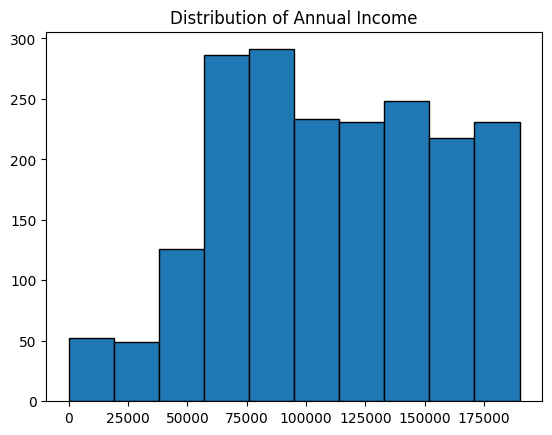

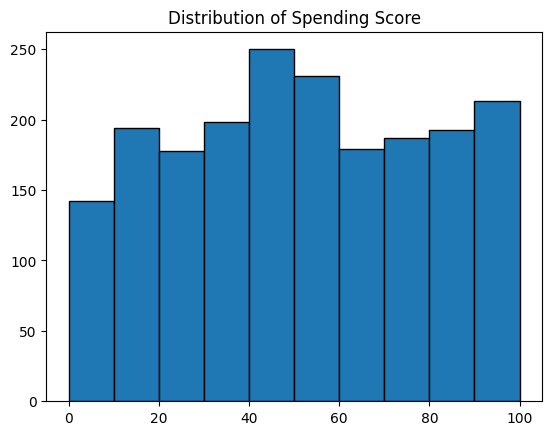

In [5]:
# Visualize the distribution of the numeric variables
plt.hist(df['Annual Income ($)'],edgecolor='black')
plt.title('Distribution of Annual Income')
plt.show()

plt.hist(df['Spending Score (1-100)'],edgecolor='black')
plt.title('Distribution of Spending Score')
plt.show()

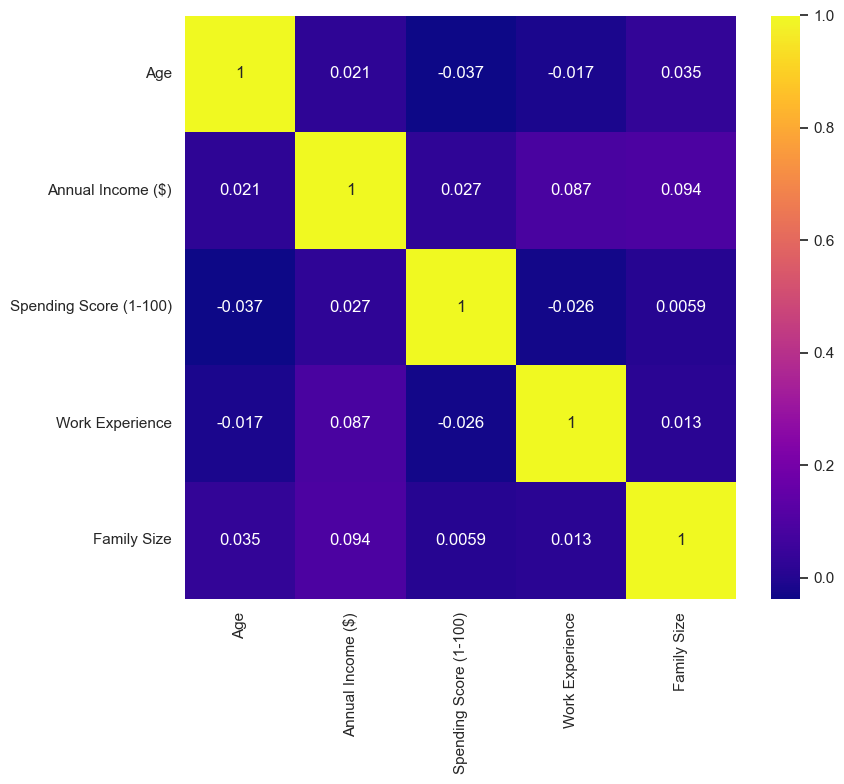

In [6]:
# Plot the correlation matrix of the numeric variables
cor = df.drop(['Gender','Profession'],axis='columns').corr()
sns.set(font_scale=1.0)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

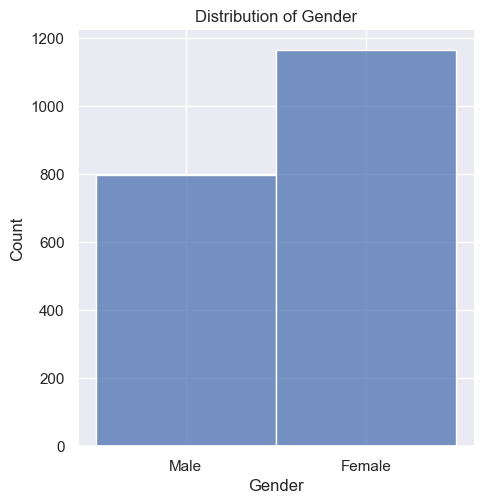

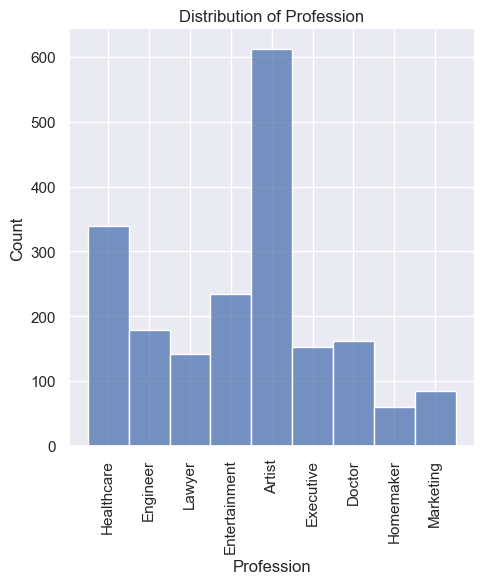

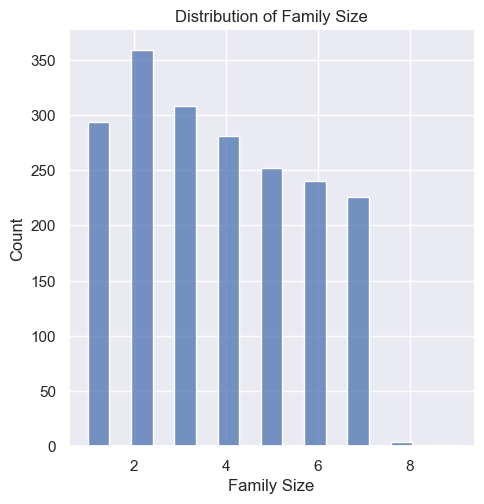

In [14]:
# Plot the distribution of the categorical variables
sns.displot(df['Gender'])
plt.title('Distribution of Gender')
plt.show()

sns.displot(df['Profession'])
plt.xticks(rotation=90)
plt.title('Distribution of Profession')
plt.show()

sns.displot(df['Family Size'])
plt.title('Distribution of Family Size')
plt.show()

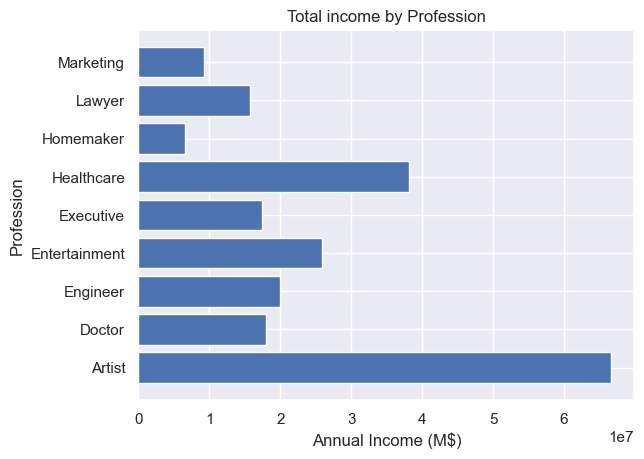

In [104]:
total_by_profession = df.groupby('Profession').sum()['Annual Income ($)']
# Plot the sales by year
plt.barh(total_by_profession.index, total_by_profession.values)
plt.title('Total income by Profession')
plt.xlabel("Annual Income (M$)")
plt.ylabel("Profession")
plt.show()

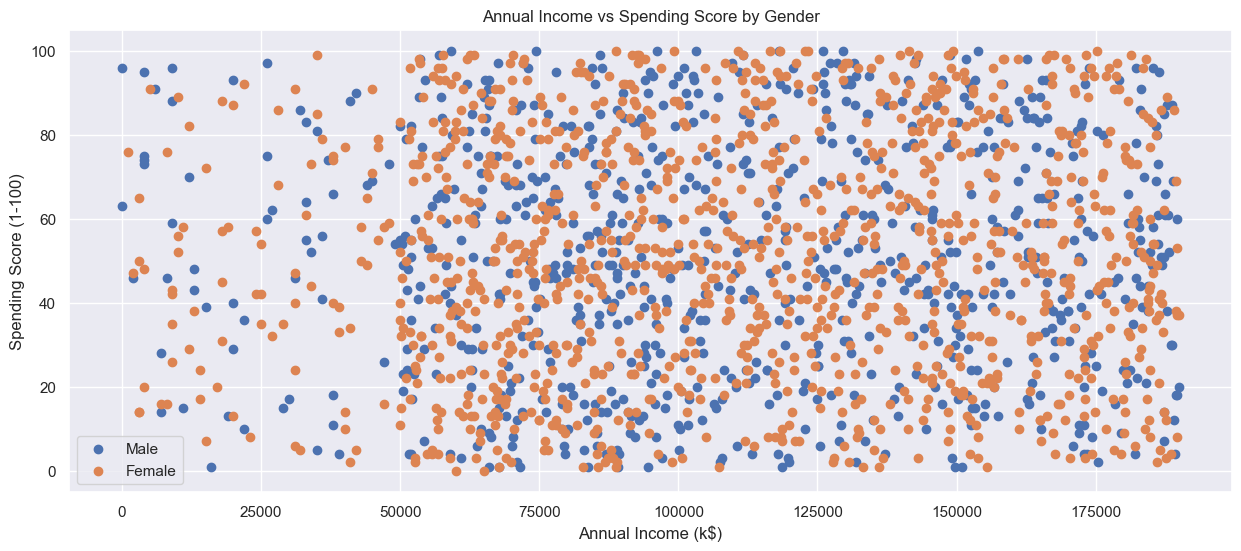

In [105]:
plt.figure(1 , figsize = (15 , 6))
GM = df[df['Gender']== 'Male']
GF = df[df['Gender']== 'Female']
plt.scatter('Annual Income ($)','Spending Score (1-100)',data = GM, label = "Male")
plt.scatter('Annual Income ($)','Spending Score (1-100)',data = GF, label = 'Female')
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.legend()
plt.show()


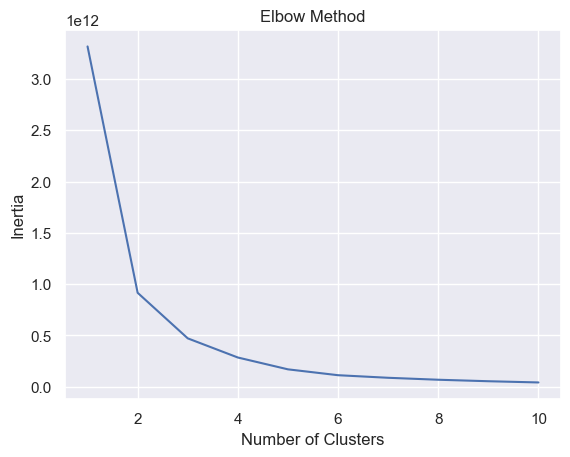

Silhouette score: 0.556864656144943
Davies-Bouldin Index: 0.5665797099932522


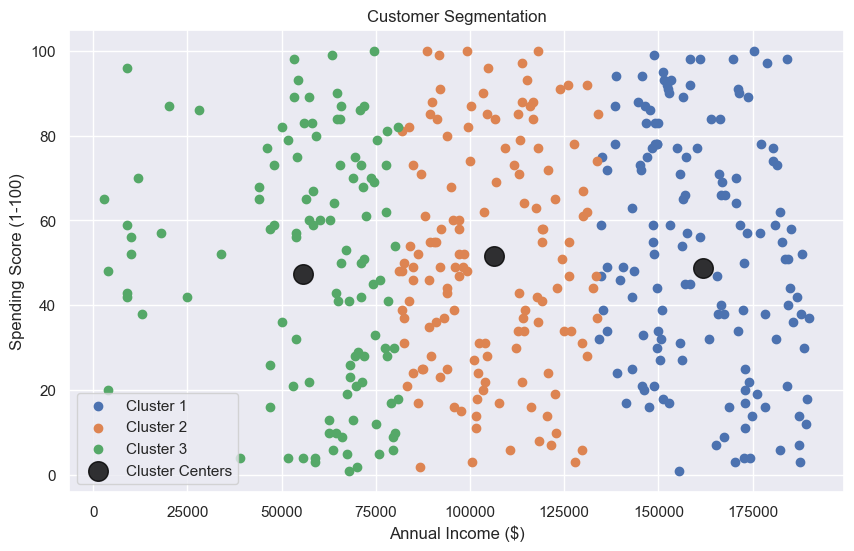

In [106]:
# Split the data into training and testing sets
X = df.drop([ 'Gender', 'Profession', 'Family Size'], axis=1)
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    
# Plot the inertia values to determine the optimal number of clusters
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Train the K-Means model on the training data
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
kmeans.fit(X_train)

# Predict the clusters for the test data
y_pred = kmeans.predict(X_test)

# Calculate the silhouette score for the clustering
score = silhouette_score(X_test, y_pred)
print(f"Silhouette score: {score}")

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(X_test, y_pred)
print(f"Davies-Bouldin Index: {dbi}")

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10,6))

# Get unique labels
labels = np.unique(y_pred)

# Plot each cluster separately with corresponding label
for label in labels:
    plt.scatter(X_test[y_pred==label]['Annual Income ($)'], X_test[y_pred==label]['Spending Score (1-100)'], label=f'Cluster {label+1}')
    
# Plot the centers of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1],centers[:, 0],  c='black', s=200, alpha=0.8, label='Cluster Centers')

# Add legend
plt.legend(loc='lower left')

plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()